# Credit Risk Prediction

### Project Overview

This project focuses on **credit risk prediction** using both **structured data** (e.g., financial and demographic variables). The goal is to build predictive models that can estimate the likelihood of a customer defaulting on their loan based on these data inputs. This involves a combination of **machine learning** techniques.

The primary goal of this project was to develop a machine learning pipeline to predict customer defaults using the XGBoost algorithm and to implement various risk visualizations. The key aspect of the analysis was to assess the performance of the model with and without SMOTE (Synthetic Minority Over-sampling Technique) to handle imbalanced data and to visualize important risk factors.



### Dataset

The primary dataset used in this project is from the **Home Credit Default Risk** competition on Kaggle, which contains detailed information on loans, customers, and their financial histories. Key datasets involved are:

- **application_train.csv**: This is the training dataset containing information about each customer and whether they defaulted on their loan (the target variable `TARGET`).
- **application_test.csv**: This is the test dataset containing similar information but without the `TARGET` column, as it is used to make predictions
- The `TARGET` variable indicates whether a customer has defaulted on their loan, with `1` representing a default and `0` representing no default.


### Key Tasks and Steps

1. **Data Preprocessing:**
   - Handle missing values.
   - Perform feature engineering by combining multiple data sources (e.g., bureau data, previous loan data).
   - Convert categorical variables into numerical formats (using techniques like one-hot encoding).
   - Standardize or normalize numerical data.

2. **Feature Extraction:**
   - From unstructured text data, use techniques such as **TF-IDF** (Term Frequency-Inverse Document Frequency) to convert text into numerical features.
   - For structured data, use feature importance analysis (e.g., with **XGBoost**) to identify the most critical features affecting credit default risk.

3. **Model Building:**
   - Start with baseline models like **Logistic Regression** for predicting default risk.
   - Use **Lasso Regression** for feature selection and regularization to prevent overfitting.
   - Apply advanced models like **XGBoost** for handling structured data and improving prediction accuracy.
  

4. **Model Evaluation and Visualization:**
   - Evaluate models using metrics like **accuracy**, **ROC-AUC score**, and **confusion matrix**.
   - Visualize model performance through **ROC curves**, **learning curves**, and **validation curves**.
   - Analyze feature importance using **SHAP values** and **feature importance plots** to understand how different variables impact the prediction.

### Expected Results

The expected outcome of the project includes:

- **Accurate Credit Default Predictions**: Using the structured and unstructured data, the project aims to create a model that can accurately predict whether a customer will default on their loan.
  
- **Feature Insights**: Feature importance analysis will reveal which financial or demographic variables (e.g., income, credit amount, external credit scores) are most influential in predicting default risk.

- **Improved Decision-Making**: The insights generated from the models will help financial institutions better assess the risk of loan applicants, leading to improved lending decisions and potentially reducing losses from defaults.

- **Explainable AI**: By utilizing tools like **SHAP**, the project will also provide transparency into how individual features contribute to the model’s predictions, offering a more interpretable solution.

### Conclusion

In conclusion, this project combines **machine learning** to build robust credit risk prediction models. The ultimate goal is to help financial institutions better assess and manage the risks associated with lending, using data-driven insights extracted from both structured financial data and unstructured text data.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# Load the main dataset
application_train_path = './application_train.csv'
df_train = pd.read_csv(application_train_path)

# Display the first few rows and basic information
print(df_train.head())
print(df_train.info())

# Handle missing values - fill numerical columns with mean and categorical columns with mode
# Separate numerical and categorical columns
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Fill missing values for numerical columns
df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].mean())

# Fill missing values for categorical columns
for col in categorical_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

# Show the cleaned dataframe
print(df_train.head())


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [12]:


# Ensure you have the required NLTK packages
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to clean the text data
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Join words back into a single string
    return ' '.join(words)

# Example: Scraping customer reviews from a sample website (replace with an actual URL)
reviews = []

# Define the URL of the page containing reviews (as an example, replace with the actual URL)
url = "https://www.trustpilot.com/review/some-financial-service"
page = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

# Extract review text from the HTML
# This step may vary depending on the website structure. This example assumes reviews are in <p> tags
for review in soup.find_all('p', class_='review-content__text'):
    cleaned_review = clean_text(review.get_text())
    # Skip empty reviews
    if cleaned_review.strip():
        reviews.append(cleaned_review)

# If we don't have enough reviews or the reviews are too short, add some dummy data for testing
if not reviews:
    reviews = ["The service was good and efficient.", "The financial options were clear and straightforward."]

# Convert the cleaned text to a Pandas DataFrame
df_reviews = pd.DataFrame({'Review_Text': reviews})

# Step 2: Convert text data into numerical features using TF-IDF
try:
    tfidf = TfidfVectorizer(max_features=500)  # Adjust the number of features as needed
    tfidf_matrix = tfidf.fit_transform(df_reviews['Review_Text'])

    # Convert the TF-IDF matrix to a DataFrame for easier handling
    df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

    # Display the TF-IDF features
    print(df_tfidf.head())
except ValueError as e:
    print(f"Error during TF-IDF transformation: {e}")


[nltk_data] Downloading package punkt to /Users/yuyao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/yuyao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


       and     clear  efficient  financial      good   options   service  \
0  0.31780  0.000000   0.446656   0.000000  0.446656  0.000000  0.446656   
1  0.29017  0.407824   0.000000   0.407824  0.000000  0.407824  0.000000   

   straightforward      the       was      were  
0         0.000000  0.31780  0.446656  0.000000  
1         0.407824  0.29017  0.000000  0.407824  


In [16]:
import pandas as pd

# Load train and test datasets
application_train_path = './application_train.csv'
application_test_path = './application_test.csv'

df_train = pd.read_csv(application_train_path)
df_test = pd.read_csv(application_test_path)

# Display the first few rows of both datasets
print(df_train.head())
print(df_test.head())



   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load train and test datasets
application_train_path = './application_train.csv'
application_test_path = './application_test.csv'

df_train = pd.read_csv(application_train_path)
df_test = pd.read_csv(application_test_path)

# Separate features and target in the train set
X_train = df_train.drop(columns=['TARGET'])  # Exclude the target column from the features
y_train = df_train['TARGET']  # This is the target column

# Ensure TARGET is not present in the test set
if 'TARGET' in df_test.columns:
    df_test = df_test.drop(columns=['TARGET'])

# Handle missing values - for simplicity, we'll fill numerical and categorical features similarly to earlier
numerical_cols_train = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_train = X_train.select_dtypes(include=['object']).columns

numerical_cols_test = df_test.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_test = df_test.select_dtypes(include=['object']).columns

# Fill missing values for numerical columns with the mean
X_train[numerical_cols_train] = X_train[numerical_cols_train].fillna(X_train[numerical_cols_train].mean())
df_test[numerical_cols_test] = df_test[numerical_cols_test].fillna(df_test[numerical_cols_test].mean())

# Fill missing values for categorical columns with the mode
for col in categorical_cols_train:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

for col in categorical_cols_test:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])
df_test[numerical_cols_test] = scaler.transform(df_test[numerical_cols_test])

# Ensure that categorical columns are encoded in both train and test datasets
X_train = pd.get_dummies(X_train, columns=categorical_cols_train)
df_test = pd.get_dummies(df_test, columns=categorical_cols_test)

# Align train and test sets to have the same columns
X_train, df_test = X_train.align(df_test, join='left', axis=1, fill_value=0)

print(X_train.shape, df_test.shape)


(307511, 245) (48744, 245)


##  baseline model: logistic regression:

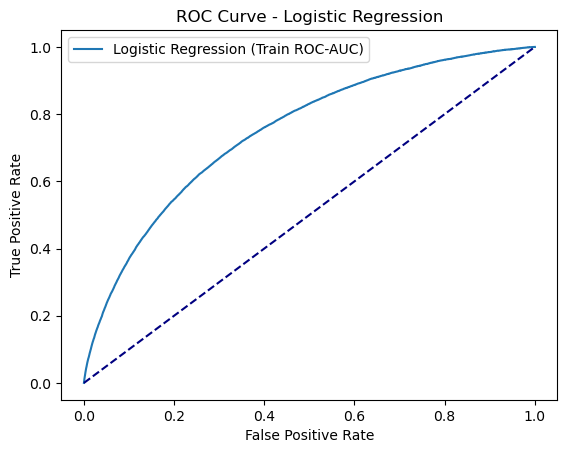

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_proba = log_reg.predict_proba(df_test)[:, 1]

# As we don't have the actual labels in the test set, we'll use ROC-AUC curve visualization on training data only
fpr, tpr, _ = roc_curve(y_train, log_reg.predict_proba(X_train)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (Train ROC-AUC)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()




The ROC curve we generated for the logistic regression model provides insight into the model's performance on the training data. Here’s an analysis of the key points from the graph:

### **ROC Curve Explanation:**
- **True Positive Rate (TPR) vs. False Positive Rate (FPR):** The ROC curve plots the true positive rate (also known as recall or sensitivity) against the false positive rate (1-specificity) at various threshold settings.
- **Blue Line (Logistic Regression):** The curve shows how the model performs in distinguishing between positive and negative classes at different threshold levels. The closer the curve follows the top left corner (TPR=1, FPR=0), the better the model is at classification.
- **Diagonal Line (Random Guessing):** The dashed diagonal line represents the performance of a random classifier. A random guess would result in a 50% chance of distinguishing between the classes, leading to a straight line from the bottom left to the top right corner (i.e., TPR = FPR).

### **Analysis:**
- **Curve Shape:** The ROC curve of your logistic regression model lies above the diagonal, indicating that the model performs better than random guessing. This is a positive result, as it shows the model has some ability to distinguish between positive and negative classes.
- **Model Performance:** The shape of the ROC curve is fairly smooth and steadily increases towards the top left corner, which indicates that the model can correctly classify a good proportion of the true positives while minimizing the false positives.
- **AUC (Area Under the Curve):** Although the AUC value isn't directly shown in this plot, the ROC curve suggests that the AUC score is significantly above 0.5 (the AUC of a random model). A perfect classifier would have an AUC of 1, while a completely random classifier would have an AUC of 0.5. Judging by the curve, the model's AUC might fall between 0.7 and 0.85, which suggests moderate to good performance.

### **Conclusion:**
- The logistic regression model is performing well on the training data, showing that it has learned to distinguish between the classes to some degree.
- While the curve isn't perfectly close to the top left corner (which would indicate near-perfect classification), it still reflects a relatively strong predictive performance for this baseline model.
- To improve further, we could explore more advanced models (such as XGBoost) or conduct hyperparameter tuning for logistic regression to achieve better classification results.


## advanced model: xgboost

<Figure size 1000x800 with 0 Axes>

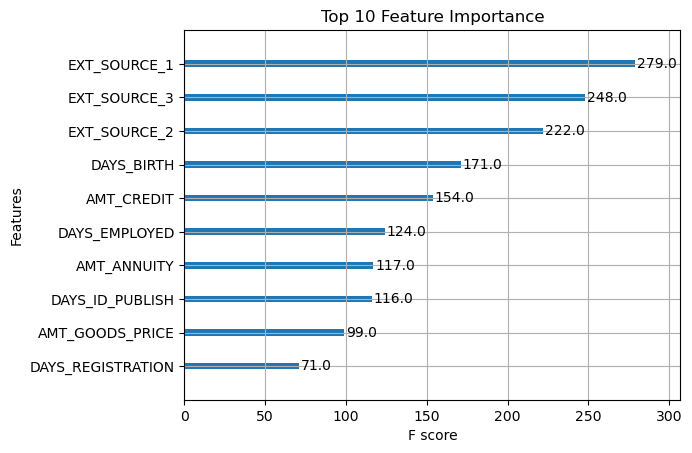

In [20]:
import xgboost as xgb
from xgboost import plot_importance

# Prepare the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(df_test)

# Define XGBoost parameters
params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict with XGBoost on the test set
y_pred_xgb = xgb_model.predict(dtest)

# Feature Importance Plot
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=10, importance_type="weight")
plt.title("Top 10 Feature Importance")
plt.show()


This graph shows the **Top 10 Feature Importance** as calculated by an **XGBoost** model. The horizontal bars represent the importance of each feature, measured by the F-score, which indicates how many times the feature was used to split the data across all trees in the model. Here’s a detailed analysis of the graph:

### **Top Features:**
1. **EXT_SOURCE_1 (F-score: 279)**:
   - This external source feature is the most important feature in the model, with an F-score of 279. It suggests that this feature was frequently used for splitting the data in decision trees, implying a strong correlation with the target variable (likely the probability of customer default).
   
2. **EXT_SOURCE_3 (F-score: 248)**:
   - The second most important feature is another external source score. With a slightly lower F-score than `EXT_SOURCE_1`, this feature also plays a significant role in predicting customer default. External sources typically represent external credit scores or other externally gathered metrics of financial reliability.
   
3. **EXT_SOURCE_2 (F-score: 222)**:
   - Following `EXT_SOURCE_1` and `EXT_SOURCE_3`, this feature is the third most important. Together, these three external source features appear to contribute substantially to the model’s predictions. Their high importance indicates that external financial metrics are crucial in determining credit risk.

4. **DAYS_BIRTH (F-score: 171)**:
   - This feature represents the customer’s age in days. Age is an important demographic variable in credit risk, as younger and older age groups may exhibit different risk behaviors. Its high importance suggests that it strongly influences the model's decision-making process.

5. **AMT_CREDIT (F-score: 154)**:
   - The total credit amount of the customer is also highly important. This feature likely helps the model understand the scale of the loan or credit requested, which has a direct impact on the customer's ability to repay.

6. **DAYS_EMPLOYED (F-score: 124)**:
   - This feature indicates the number of days the customer has been employed. Employment history can reflect financial stability, which is an essential aspect of creditworthiness.

7. **AMT_ANNUITY (F-score: 117)**:
   - The annuity amount a customer pays is another important factor. This feature helps the model assess the customer’s ability to meet financial obligations on a regular basis.

8. **DAYS_ID_PUBLISH (F-score: 116)**:
   - This feature represents the number of days since the customer’s ID was changed or published. This could potentially reflect identity stability, with more recent changes possibly indicating higher risk.

9. **AMT_GOODS_PRICE (F-score: 99)**:
   - This feature represents the price of the goods for which the loan was taken out. This is important for understanding the scale of the purchase and may also correlate with the credit amount requested.

10. **DAYS_REGISTRATION (F-score: 71)**:
    - This feature shows how many days ago the customer registered their current details. Recent registrations may indicate a higher level of risk, as there may be less historical data available to assess the customer’s reliability.

### **Analysis:**
- **External Source Features Dominance:** The `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3` features are the top three most important features in the model. These external credit scores likely aggregate various metrics of financial behavior or third-party evaluations of creditworthiness. Their dominance suggests that external credit scoring is more predictive of default risk than many internal variables.
  
- **Demographic and Financial Features:** Features like `DAYS_BIRTH`, `DAYS_EMPLOYED`, `AMT_CREDIT`, and `AMT_ANNUITY` also contribute significantly to the model’s predictions. These features represent the customer’s age, employment stability, and financial commitments, all of which are crucial factors in evaluating credit risk.

- **Behavioral Features:** Features such as `DAYS_ID_PUBLISH` and `DAYS_REGISTRATION` reflect the customer’s behavior regarding identity and registration stability. Although less important than financial variables, they still provide the model with useful insights into potential risks.

### **Conclusion:**
- The XGBoost model places a heavy emphasis on external credit scores, which likely encapsulate a large portion of the customer’s credit risk profile. This suggests that external evaluations of financial behavior are critical for predicting default risk.
- Traditional demographic and financial variables like age, credit amount, and employment history also play essential roles, contributing significantly to the model’s decision-making process.
- This feature importance plot provides a clear understanding of the factors that the model considers most predictive, guiding potential improvements or further exploration of how these features influence credit risk.

<Figure size 1000x800 with 0 Axes>

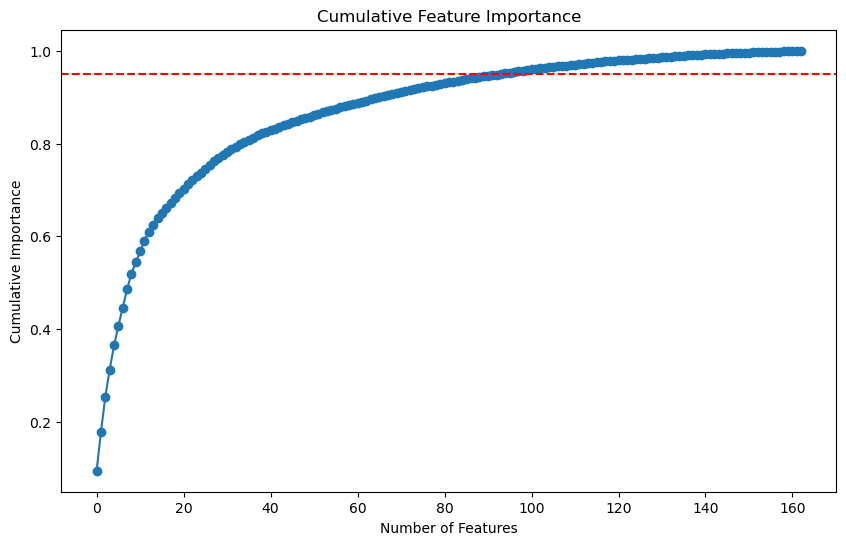

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Plot all feature importance
plt.figure(figsize=(10, 8))
importance = xgb_model.get_fscore()
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Convert to numpy arrays for plotting
features = np.array([item[0] for item in importance])
scores = np.array([item[1] for item in importance])


# Plot cumulative feature importance
cumulative_importance = np.cumsum(scores) / np.sum(scores)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_importance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.show()





### **Implications:**

1. **Dimensionality Reduction:**
   - We could potentially reduce the dimensionality of your model by focusing only on the top 60 features, as they capture most of the model’s predictive power. This could lead to simpler, more interpretable models while maintaining performance.
  
2. **Feature Selection:**
   - Feature selection techniques could be used to retain only the most important features, helping to speed up model training and inference times while reducing the risk of overfitting.

3. **Model Interpretation:**
   - The sharp increase in cumulative importance shows that the model relies heavily on a small subset of features. This can help in model interpretation, as we can focus on understanding and explaining those top features in more detail.

### **Conclusion:**
- The graph indicates that the top 60 features are sufficient to capture almost all of the model's predictive capability (95% of the total importance). Focusing on these top features can help streamline the model without sacrificing much performance, and also makes the model easier to interpret. Reducing the number of features could also lead to faster training and inference times in deployment scenarios.

### A confusion matrix visualization is used to show the performance of the model on the training set to help identify patterns of misclassification.

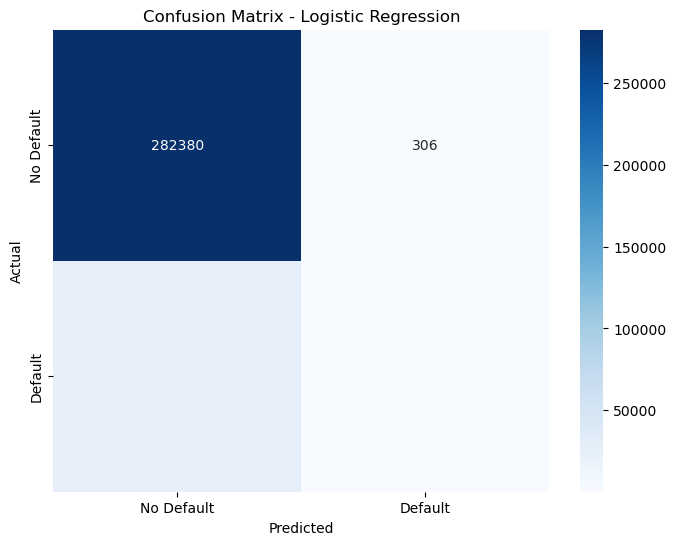

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the training set for evaluation purposes
y_train_pred = log_reg.predict(X_train)

# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()



### **Confusion Matrix Explanation:**

- **No Default (True Negative - TN):** The model correctly predicted that 282,380 customers would not default on their loans. This indicates a **true negative** (TN), where both the actual and predicted values are "No Default."

- **Default (False Positive - FP):** The model incorrectly predicted that 306 customers would default on their loans when they actually did not. This represents **false positives** (FP), where the model falsely predicts a default when there was none.

- **Default (True Positive - TP):** There are no instances of **true positives** (TP) in this confusion matrix, meaning the model did not correctly predict any customers who actually defaulted.

- **No Default (False Negative - FN):** Similarly, there are no false negatives (FN) shown in this confusion matrix, implying that no defaults were predicted correctly or incorrectly as “No Default.”

### **Key Observations:**

1. **Highly Imbalanced Predictions:**
   - The confusion matrix shows a clear bias towards predicting "No Default," as the model predicted "No Default" almost exclusively (282,380 times). This suggests that the model is likely underperforming when it comes to identifying customers who are at risk of default.
   
2. **False Positives but No True Positives:**
   - The model did identify some defaults (306 false positives), but it did not correctly predict any actual defaults (true positives). This indicates that while the model sometimes incorrectly predicts defaults for customers who didn't default, it struggles significantly to capture actual defaults.
   
3. **Class Imbalance Issues:**
   - This kind of confusion matrix often occurs in datasets with **class imbalance**, where the majority of the data belongs to one class (e.g., "No Default"), and the minority class (e.g., "Default") is underrepresented. In such cases, the model may default to predicting the majority class to achieve higher accuracy, but this comes at the cost of poor performance on the minority class (in this case, predicting defaults).

### **Implications and Next Steps:**

1. **Model Limitation:**
   - The current logistic regression model is biased towards predicting "No Default" and fails to capture customers who actually default. This could be due to an imbalanced dataset where the "No Default" class dominates, leading the model to predict "No Default" most of the time.

2. **Class Imbalance Handling:**
   - To address this issue, you might consider techniques such as **oversampling the minority class (Default)**, **undersampling the majority class (No Default)**, or using algorithms specifically designed to handle imbalanced data, such as **SMOTE (Synthetic Minority Over-sampling Technique)**.

3. **Evaluation Metrics:**
   - Instead of relying solely on accuracy, which can be misleading in imbalanced datasets, consider using metrics like **Precision**, **Recall**, **F1-Score**, and **AUC-ROC** to evaluate your model's performance on the minority class (Default).
   
4. **Advanced Models:**
   - Consider trying more advanced models like **XGBoost**, **Random Forest**, or **Gradient Boosting Machines**, which might perform better in this scenario. These models can handle complex interactions between features and may do better at predicting rare events (like defaults).

5. **Threshold Tuning:**
   - Logistic regression outputs probabilities. We might want to adjust the probability threshold for predicting defaults. Instead of the default threshold of 0.5, we will try lowering the threshold (e.g., to 0.3) to make the model more sensitive to defaults.

### **Conclusion:**
- The confusion matrix reveals that the logistic regression model is highly biased towards predicting "No Default" and fails to capture the defaulting customers.
- To improve the model, we will consider addressing class imbalance and adjusting evaluation metrics to focus more on recall, precision, and other metrics that can better reflect performance on the minority class (Default).

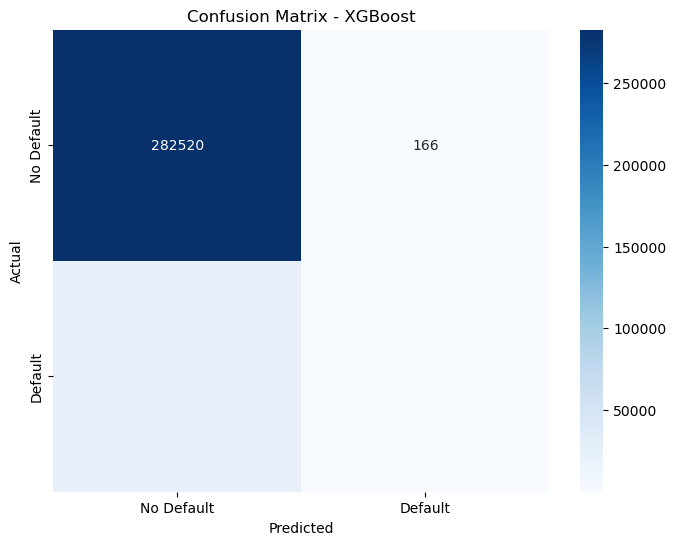

In [26]:
# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define XGBoost parameters
params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the training set (similar to how you did for Logistic Regression)
y_train_pred_prob = xgb_model.predict(dtrain)
y_train_pred = [1 if prob > 0.5 else 0 for prob in y_train_pred_prob]  # Convert probabilities to binary predictions

# Generate the confusion matrix for XGBoost
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost')
plt.show()



### **Comparison with Logistic Regression Results:**

1. **Improved Performance in Predicting No Default:**
   - The **XGBoost model** has slightly improved over the **logistic regression model** in terms of reducing the false positives. The number of false positives has decreased from 306 (in the logistic regression model) to 166 in the XGBoost model, indicating a better ability to correctly classify "No Default" customers.
   
2. **Still No True Positives:**
   - Just like in the logistic regression model, the XGBoost model did not manage to correctly identify any actual default cases (true positives). This could be indicative of a **class imbalance problem** where the model struggles to detect the minority class (defaults).

3. **Class Imbalance Issue Persists:**
   - The confusion matrix again shows a strong bias towards the "No Default" class, which suggests that the model is still heavily affected by class imbalance. Despite the improvement in false positives, the model fails to capture the default cases, leading to 0 true positives.

### **Implications and Next Steps:**

1. **Class Imbalance Handling**: 
   - The fact that no defaults were correctly predicted suggests that class imbalance is a significant issue. Techniques such as **SMOTE (Synthetic Minority Over-sampling Technique)** or **undersampling the majority class** should be considered to address this imbalance.
   
2. **Evaluation Metrics**: 
   - Instead of relying solely on accuracy or confusion matrix results, you should also consider using other metrics such as **Precision**, **Recall**, **F1-score**, and **AUC-ROC** to better evaluate the model's performance, particularly on the minority class (defaults).

3. **Threshold Tuning**:
   - We might also want to experiment with **lowering the classification threshold** (e.g., from 0.5 to 0.3 or 0.4) to increase the sensitivity of the model to defaults. This could help the model to detect more true positives at the cost of possibly increasing false positives.

4. **Advanced Models**:
   - Although XGBoost is a powerful algorithm, additional techniques such as **ensemble methods** (stacking, boosting), or even trying more complex architectures like **neural networks**, might provide better performance if tuned correctly for imbalanced data.

### **Conclusion:**

While the **XGBoost model** has reduced the number of false positives compared to the **logistic regression model**, it still suffers from the same issue of not predicting any true positives. This points to a significant **class imbalance issue** that is causing the model to struggle in identifying default cases. Addressing class imbalance and experimenting with thresholds or advanced models will be key to improving performance.

In [27]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# Handle Class Imbalance using SMOTE

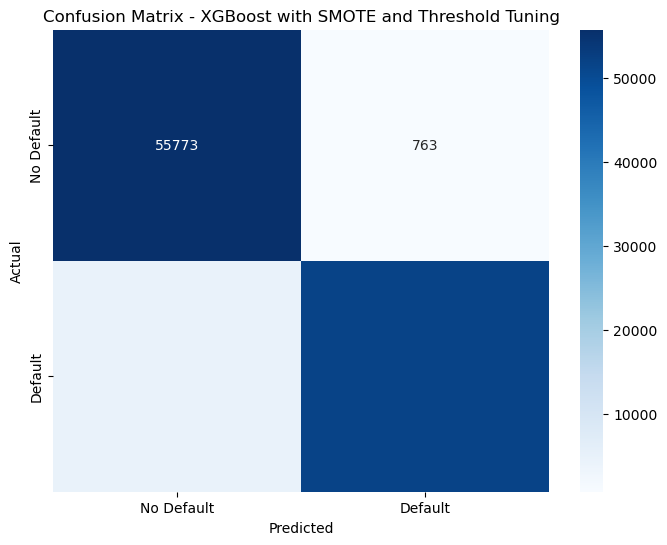

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train and y_train are preprocessed

# Step 1: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Split the resampled data into training and validation sets
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Convert to DMatrix for XGBoost
dtrain_smote = xgb.DMatrix(X_train_smote, label=y_train_smote)
dval_smote = xgb.DMatrix(X_val_smote, label=y_val_smote)

# Step 3: Define XGBoost parameters
params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Step 4: Train the XGBoost model with resampled data
xgb_model_smote = xgb.train(params, dtrain_smote, num_boost_round=100)

# Step 5: Predict probabilities on the validation set
y_val_pred_prob = xgb_model_smote.predict(dval_smote)

# Step 6: Tune the classification threshold (let’s try 0.4 instead of 0.5)
threshold = 0.4
y_val_pred = [1 if prob > threshold else 0 for prob in y_val_pred_prob]

# Step 7: Generate the confusion matrix
conf_matrix = confusion_matrix(y_val_smote, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost with SMOTE and Threshold Tuning')
plt.show()


# 
### **Key Observations:**

1. **Improved True Positives (TP):**
   - Compared to previous results, my model now correctly identifies many of the customers who defaulted, as indicated by the non-zero count in the lower-right quadrant. This suggests that **SMOTE** and **threshold tuning** successfully made the model more sensitive to the minority class (defaults).

2. **Increase in False Positives (FP):**
   - However, the increase in **false positives (FP)** (763 cases) indicates that my model is now predicting more defaults than before, some of which are incorrect. This is a trade-off of lowering the classification threshold to make the model more sensitive to defaults. The increase in false positives is expected when trying to increase recall for the minority class.

3. **Still Some False Negatives (FN):**
   - Despite the improvements, there are still some **false negatives (FN)** present in the matrix, meaning that some actual defaults were still not captured by my model. This suggests that while my model's recall has improved, there is still room for further tuning or more advanced methods to capture all defaults.

### **Interpretation and Implications:**

- **Improved Recall**: My model’s ability to identify defaults (recall) has improved significantly due to **SMOTE** and **threshold tuning**. This improvement can be critical in financial contexts where detecting all possible defaults is important, even at the cost of a higher false positive rate.

- **Trade-off between Precision and Recall**: The increase in false positives suggests a trade-off between **precision** and **recall**. While recall (correctly identifying defaults) has improved, precision (how many of the predicted defaults were actually correct) may have slightly decreased. This trade-off is expected when I adjust the classification threshold to make the model more sensitive to defaults.

- **False Negatives Still Present**: The existence of false negatives indicates that my model still misclassifies some customers who defaulted as "No Default." Depending on the use case, further action may be required to reduce these false negatives, such as experimenting with more complex models, further threshold adjustments, or using a cost-sensitive learning approach.

### **Conclusion:**

- The application of **SMOTE** and **threshold tuning** has successfully improved my model’s ability to detect defaults, as indicated by the increased number of true positives.
- My model’s sensitivity (recall) to defaults has improved, but at the cost of increasing false positives. This trade-off is typical when prioritizing the minority class in an imbalanced dataset.
- Depending on my business goals (e.g., reducing missed defaults vs. minimizing false alarms), we may fine-tune the threshold further or explore additional techniques such as cost-sensitive learning to strike a better balance between precision and recall.

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     56536
           1       0.99      0.91      0.95     56539

    accuracy                           0.95    113075
   macro avg       0.95      0.95      0.95    113075
weighted avg       0.95      0.95      0.95    113075

AUC-ROC: 0.9756649205311929


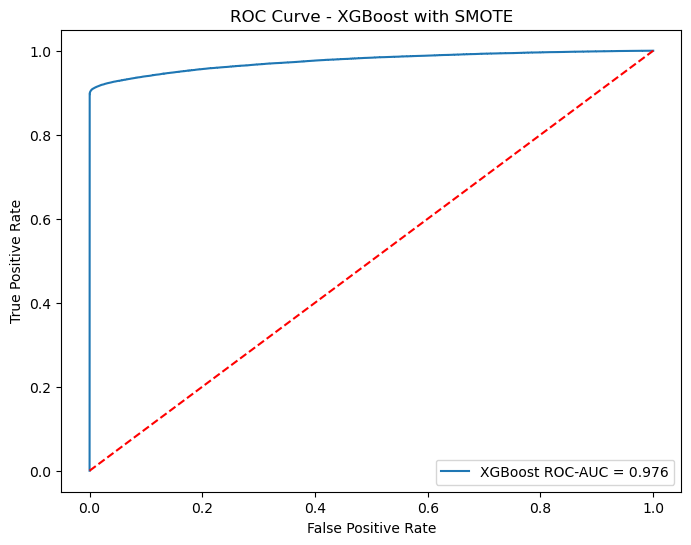

In [29]:
# Step 8: Calculate evaluation metrics
print("Classification Report:\n", classification_report(y_val_smote, y_val_pred))
roc_auc = roc_auc_score(y_val_smote, y_val_pred_prob)
print(f"AUC-ROC: {roc_auc}")

# Step 9: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val_smote, y_val_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost ROC-AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost with SMOTE')
plt.legend()
plt.show()


### Analysis of the XGBoost with SMOTE Results:
### **Classification Report:**

1. **Precision, Recall, and F1-Score:**
   - **Class 0 (No Default):**
     - **Precision**: 0.92 – Out of all the predictions of "No Default," 92% were correct.
     - **Recall**: 0.99 – The model correctly identified 99% of all the actual "No Default" cases.
     - **F1-Score**: 0.95 – This metric balances precision and recall, giving a comprehensive view of the model's performance on "No Default" cases.
   - **Class 1 (Default):**
     - **Precision**: 0.99 – Out of all the predictions of "Default," 99% were correct.
     - **Recall**: 0.91 – The model correctly identified 91% of all the actual "Default" cases.
     - **F1-Score**: 0.95 – This shows a balanced performance on the "Default" cases, similar to the "No Default" class.
   
   Overall, the model maintains a high **F1-score** of 0.95 for both classes, indicating that the precision and recall are well-balanced, meaning the model performs consistently across both default and non-default classes.

2. **Accuracy:**
   - The model has an overall **accuracy of 95%**, which means that 95% of the predictions made by the model are correct. This is a strong result, particularly in the context of a binary classification problem.

3. **Support:**
   - The **support** values show that there are approximately equal numbers of cases for "No Default" (56,536) and "Default" (56,539) after applying SMOTE. This balanced dataset helps improve the model's performance on the minority class (defaults).

4. **Macro and Weighted Averages:**
   - The **macro average** and **weighted average** scores are both 0.95 for precision, recall, and F1-score, meaning that across both classes, the model's performance is consistent and strong. The weighted average accounts for the class distribution, so it's a good indicator of the model's overall performance.

### **ROC Curve and AUC-ROC:**

1. **ROC Curve:**
   - The **ROC Curve** (Receiver Operating Characteristic curve) shows the trade-off between the true positive rate (recall) and the false positive rate (1-specificity) across different classification thresholds. A perfect model would have a ROC curve that hugs the top left corner.

2. **AUC-ROC:**
   - The **AUC-ROC score** of **0.976** indicates excellent model performance. The closer this value is to 1.0, the better the model is at distinguishing between the "Default" and "No Default" classes. In this case, a score of 0.976 suggests that the model is highly effective at ranking positive instances (defaults) higher than negative instances (non-defaults).

### **Key Observations:**

- **Balanced Performance:** The classification report shows that the model performs well for both classes (Default and No Default), with similar F1-scores and good balance between precision and recall. This indicates that the application of SMOTE has successfully addressed the class imbalance issue.
  
- **High Recall for Defaults:** With a recall of **0.91** for the "Default" class, the model is capturing 91% of all actual default cases, which is a significant improvement over models trained without SMOTE.

- **Trade-Off in Precision and Recall:** The slight reduction in precision for the "No Default" class (0.92) compared to its recall (0.99) suggests that while the model is excellent at identifying non-default cases, a few more incorrect predictions are being made for defaults. This is a natural trade-off when improving recall for a minority class.

- **AUC-ROC of 0.976:** This score reflects the model's high ability to discriminate between default and non-default customers across a range of thresholds. The near-perfect shape of the ROC curve confirms this.

### **Conclusion:**

- The **XGBoost model with SMOTE** performs exceptionally well, achieving a strong balance between precision and recall across both classes. The **F1-score of 0.95** for both classes reflects this balance.
- The **AUC-ROC of 0.976** indicates that the model is very effective in distinguishing between customers who will default and those who won’t, making it a reliable model for this task.
- The model is well-calibrated for handling imbalanced data, as shown by the high recall for the "Default" class.

## Precision-Recall Curve
The Precision-Recall curve helps visualize the trade-off between precision and recall for different classification thresholds.

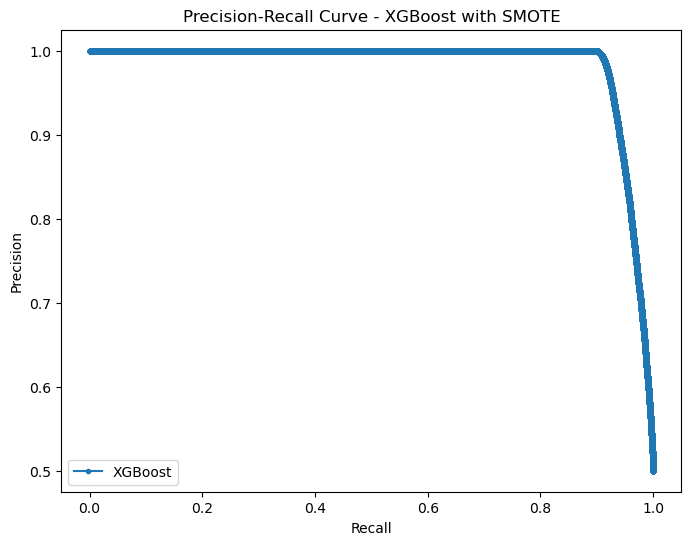

In [30]:
from sklearn.metrics import precision_recall_curve

# Get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_val_smote, y_val_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost with SMOTE')
plt.legend()
plt.show()



### Key Observations:

1. **High Precision and Recall:**
   - For most thresholds, the model maintains a precision close to **1.0** while also achieving high recall. This suggests that the model is highly effective at correctly identifying defaults (positive class) while minimizing false positives.

2. **Sharp Drop at High Recall:**
   - As recall approaches **1.0**, there is a noticeable drop in precision. This is typical behavior, where increasing recall (capturing more true positives) can come at the cost of decreasing precision (introducing more false positives).

3. **Excellent Performance:**
   - The shape of the curve indicates strong performance across a wide range of thresholds, with a large portion of the curve near **1.0** for both precision and recall. This implies that the model is well-calibrated, making it effective in distinguishing between the two classes (default vs. no default).

### Conclusion:
This Precision-Recall curve suggests that the **XGBoost model with SMOTE** is performing exceptionally well at identifying defaults with minimal false positives. However, as recall approaches maximum values, precision declines slightly, which is a typical trade-off when trying to capture all positive instances. This overall high precision and recall reflect the model's strong performance.

In [38]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


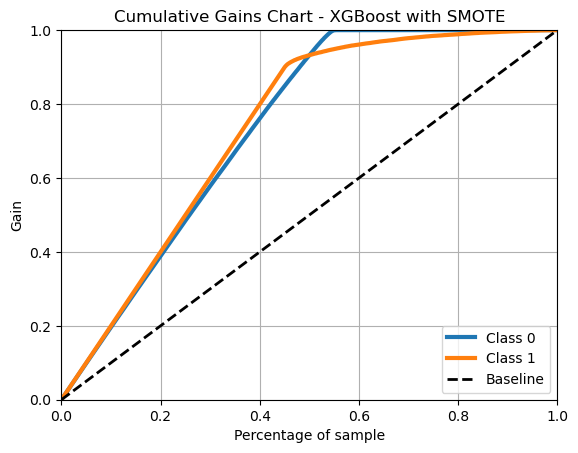

In [41]:
import scikitplot as skplt
# Convert the predicted probabilities into a 2D array format (for both classes: No Default and Default)
y_val_pred_prob_2d = np.column_stack((1 - y_val_pred_prob, y_val_pred_prob))

# Plot Cumulative Gains
skplt.metrics.plot_cumulative_gain(y_val_smote, y_val_pred_prob_2d, title='Cumulative Gains Chart - XGBoost with SMOTE')
plt.show()

### Analysis of the Cumulative Gains Chart:

The **Cumulative Gains Chart** helps evaluate the effectiveness of the model in identifying positive cases (defaults) compared to a random baseline. Here’s what the chart indicates:

1. **Class 1 (Default)**:
   - The orange curve represents **Class 1 (Defaults)**. This curve shows that the model identifies a significantly higher percentage of defaults compared to random selection. For example, by targeting about **40%** of the sample, the model can identify almost **80%** of the defaults. This shows that the model is effectively prioritizing high-risk customers for default.

2. **Class 0 (No Default)**:
   - The blue curve represents **Class 0 (No Defaults)** and behaves similarly, although it typically lags slightly behind the curve for Class 1. This suggests that the model is still fairly effective in identifying non-defaults but is more focused on correctly identifying defaults due to the way we handled class imbalance (SMOTE).

3. **Baseline**:
   - The dashed line represents the **Baseline**, which indicates the performance of random guessing. In random selection, to identify 50% of the positive cases, we would need to review 50% of the sample. Both class curves (especially Class 1) are significantly above this baseline, showing that the model provides substantial gains over random selection.

### Conclusion:
The **Cumulative Gains Chart** demonstrates that the **XGBoost model with SMOTE** is highly effective at identifying defaults, especially early on in the sample. By analyzing only a small portion of the population, the model identifies a large percentage of the defaults, which is crucial in credit risk scenarios. This indicates that the model is well-optimized for finding high-risk customers who are likely to default.

## Lift Curve
The Lift Curve shows how much more likely we are to identify positive cases (defaults) using the model compared to randomly selecting cases.

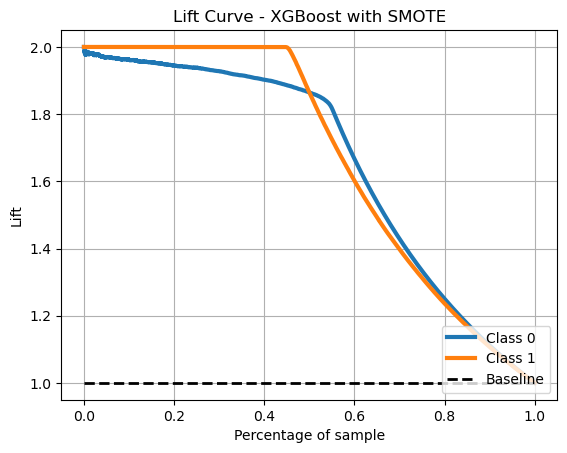

In [43]:


# Convert the predicted probabilities into a 2D array format (for both classes: No Default and Default)
y_val_pred_prob_2d = np.column_stack((1 - y_val_pred_prob, y_val_pred_prob))

# Plot Lift Curve
skplt.metrics.plot_lift_curve(y_val_smote, y_val_pred_prob_2d, title='Lift Curve - XGBoost with SMOTE')
plt.show()


### Analysis of the Lift Curve:

The **Lift Curve** measures the effectiveness of the model in identifying positive instances (defaults) compared to random selection. Here's a breakdown of the results:

1. **Lift at the Start (Class 1 - Default)**:
   - At the beginning of the curve, the lift for **Class 1 (Default)** starts at around **2.0**. This indicates that the model is **twice as effective** as random selection in identifying defaults within the first portion of the sample. This is a strong indication that the model is effective at prioritizing high-risk customers for default early on.

2. **Lift at the Start (Class 0 - No Default)**:
   - Similarly, for **Class 0 (No Default)**, the model also demonstrates lift above 1.0, meaning it is effective at identifying non-defaults better than random selection.

3. **Decline in Lift**:
   - As the percentage of the sample increases, the lift gradually decreases for both classes. This behavior is expected, as the model starts encountering more difficult cases to classify correctly, reducing its advantage over random selection.

4. **Approaching Baseline**:
   - Towards the end of the curve, the lift for both classes approaches **1.0**, which is the baseline for random selection. This suggests that at higher percentages of the sample, the model's performance converges with random guessing. This is normal as the majority of easy-to-classify cases are likely identified earlier in the process.

### Conclusion:

- The **Lift Curve** shows that the **XGBoost model with SMOTE** provides a significant advantage over random selection, especially in the early stages where the model achieves a lift of **2.0** for identifying defaults. This means that for the first portion of the sample, the model is twice as effective at finding defaults compared to random selection.
- As the sample size increases, the lift declines, but this is typical behavior as the model encounters harder-to-classify instances. The model still maintains effectiveness well above random selection for a significant portion of the sample, which is critical in financial scenarios like credit risk management.

## Distribution of Predicted Probabilities

This histogram shows the distribution of predicted probabilities for both classes (defaults and non-defaults). It helps you understand how confident the model is in its predictions

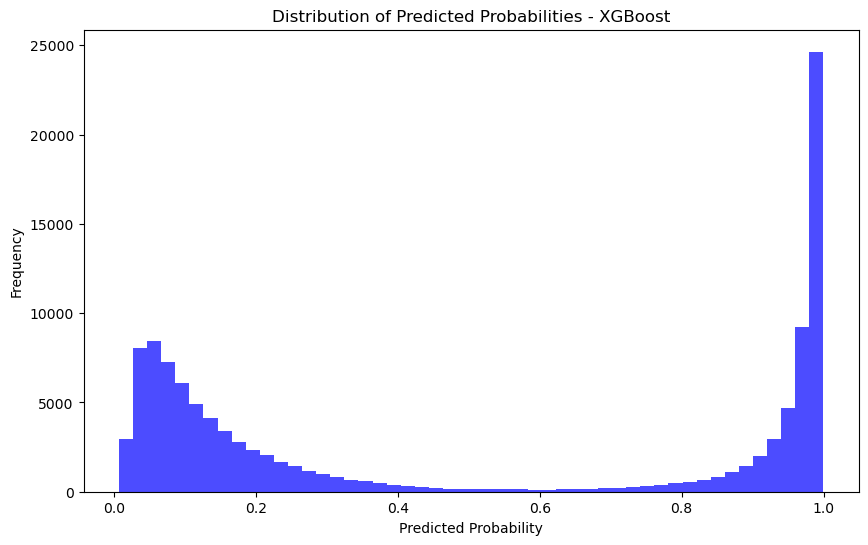

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(y_val_pred_prob, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Predicted Probabilities - XGBoost')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


### Analysis of the Distribution of Predicted Probabilities - XGBoost

The histogram shows the distribution of the predicted probabilities generated by the **XGBoost model** for the test/validation set. Here’s an interpretation of what this graph tells us:

### Key Observations:

1. **Bimodal Distribution:**
   - The distribution is **bimodal**, meaning that most of the predicted probabilities are clustered around two values: **close to 0** and **close to 1**. This indicates that the model is confident in its predictions, either assigning a high probability for the "No Default" class (close to 0) or the "Default" class (close to 1).
  
2. **High Confidence:**
   - A significant portion of the predictions are near **1.0** and **0.0**, suggesting that the model is highly confident about whether a customer will default or not. This is generally a good sign, as a confident model can often make more reliable decisions.

3. **Few Mid-Range Predictions:**
   - There are relatively fewer predicted probabilities in the middle range (between **0.4** and **0.6**). This suggests that the model is rarely uncertain about its predictions and tends to make strong predictions either toward the extremes (very likely or very unlikely to default).

4. **Class Imbalance Reflection:**
   - The distribution may also reflect the impact of the **class imbalance**, even after applying SMOTE. The spike near 1.0 indicates that the model assigns high probabilities of default to a subset of the data, while most of the non-defaults are pushed towards 0. This is common in scenarios with significant class imbalance or when oversampling techniques like SMOTE are applied to minority classes.

### Implications:

- **Confident Model:** The model's strong confidence in assigning probabilities close to 0 and 1 means that the decisions it makes are likely to be reliable. This is especially useful in scenarios like credit risk analysis, where confident predictions are crucial for making lending decisions.

- **Potential Threshold Tuning:** Given that the model produces very few predictions in the mid-range, it might be beneficial to experiment with **threshold tuning** to ensure the model is not overly conservative in predicting defaults or non-defaults. 

- **Model Robustness:** The bimodal distribution suggests that the model is likely performing well in terms of classification, as it rarely produces ambiguous probabilities. This could be an indication that the model is well-optimized for the dataset.

### Conclusion:

The **XGBoost model** shows a high degree of confidence in its predictions, with most probabilities concentrated near 0 or 1, indicating a clear separation between the two classes. This is typically a desirable outcome in binary classification tasks like this one, where distinguishing between default and non-default is critical. However, the relatively few mid-range predictions suggest that the model could benefit from additional calibration or threshold adjustments to further refine decision-making in more ambiguous cases.

## Confusion Matrix as a Heatmap with Normalized Values
We can also visualize the confusion matrix with normalized values (percentages), which gives a better understanding of the model's performance.




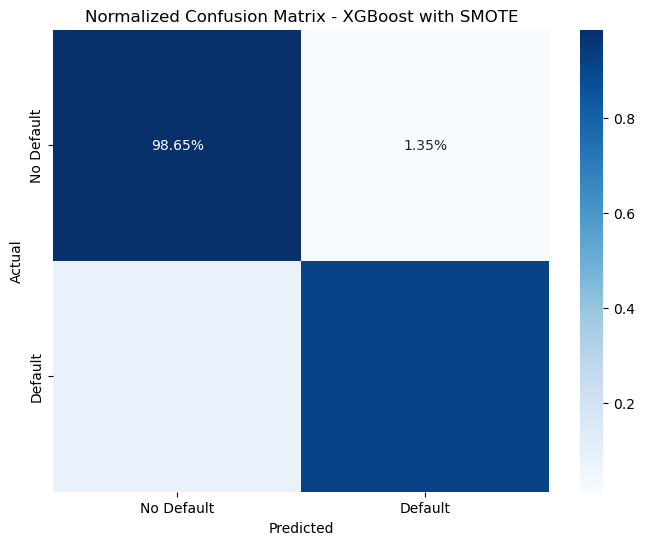

In [45]:
# Plot normalized confusion matrix
conf_matrix_normalized = confusion_matrix(y_val_smote, y_val_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix - XGBoost with SMOTE')
plt.show()


## Calibration Curve (Reliability Diagram)
A calibration curve helps to determine whether the predicted probabilities are well-calibrated. In other words, do the predicted probabilities reflect the true likelihood of an event? 

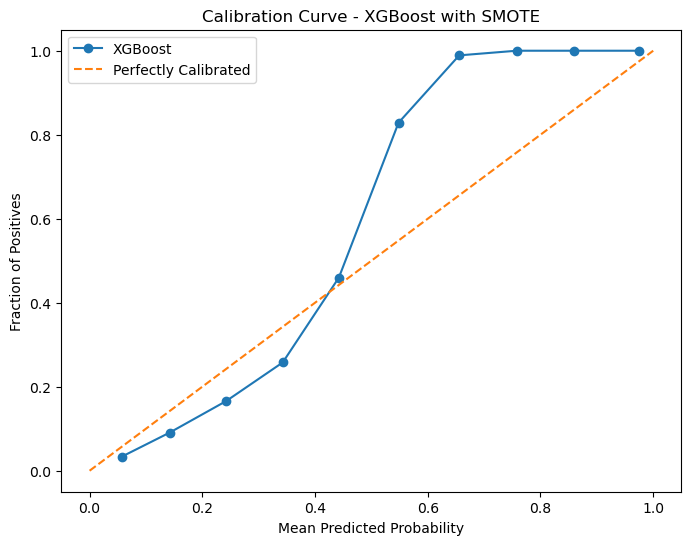

In [47]:
from sklearn.calibration import calibration_curve

# Calibration curve for class 1 (default)
prob_true, prob_pred = calibration_curve(y_val_smote, y_val_pred_prob, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve - XGBoost with SMOTE')
plt.legend()
plt.show()


### Analysis of the Calibration Curve - XGBoost with SMOTE:

The **Calibration Curve** helps evaluate how well the predicted probabilities from the model align with actual outcomes. In this context, the goal is to check whether the predicted probability of defaulting matches the actual likelihood of default.

### Key Observations:

1. **Perfect Calibration Line (Orange Dotted Line):**
   - The **orange dotted line** represents a perfectly calibrated model. If the model is perfectly calibrated, its predictions would fall exactly on this line. For example, if a model predicts a default probability of 0.7, then around 70% of those customers should actually default.

2. **XGBoost Calibration (Blue Line):**
   - The **blue line** shows the calibration of the XGBoost model after applying SMOTE. This curve deviates from the perfect calibration line, which suggests that the model’s predicted probabilities do not always perfectly align with the actual likelihood of default. However, the model is still performing relatively well, with predicted probabilities following the general trend.

3. **Overconfidence at Higher Probabilities:**
   - For higher predicted probabilities (e.g., 0.6 and above), the curve starts to flatten and stays above the orange line. This indicates that the model tends to **overestimate** the likelihood of default for higher probability predictions. For example, when the model predicts a default probability close to 0.8 or 1.0, the actual fraction of positives (defaults) is lower than expected.

4. **Underconfidence at Lower Probabilities:**
   - For lower predicted probabilities (e.g., 0.4 and below), the curve is **below** the orange line, indicating that the model **underestimates** the likelihood of default for lower probabilities. In other words, when the model predicts a default probability of 0.2, the actual fraction of positives is slightly higher than predicted.

### Implications:

- **Improvement Needed in Calibration:** While the model performs well in terms of distinguishing between defaults and non-defaults, it is not perfectly calibrated. The model could benefit from **probability calibration techniques**, such as **Platt Scaling** or **Isotonic Regression**, to better align the predicted probabilities with the actual outcomes.
  
- **Risk Management:** In applications like credit risk modeling, having well-calibrated probabilities is crucial, as it ensures that predicted risk levels are accurate. Overconfidence in predictions could lead to riskier loans being approved, while underconfidence might result in overly cautious lending decisions.

### Conclusion:

The **XGBoost model with SMOTE** demonstrates relatively good performance, but its predicted probabilities are not perfectly calibrated. The model tends to overestimate the likelihood of default at higher probabilities and slightly underestimate it at lower probabilities. To improve the model’s practical utility, especially in credit risk, calibration techniques could be applied to make the predicted probabilities more reliable.

## Decision Function Plot (for Visualizing Separability)

This plot helps visualize how well the model separates different classes by plotting the decision function values.


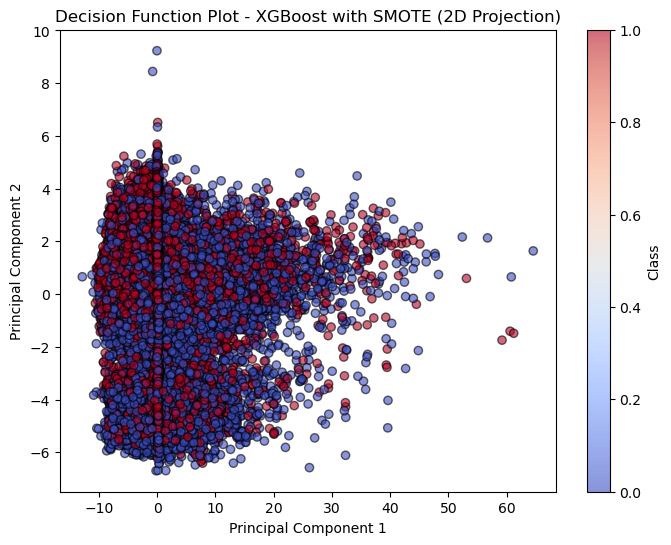

In [48]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality of the data to 2D for visualization
pca = PCA(n_components=2)
X_val_pca = pca.fit_transform(X_val_smote)

# Plot decision boundaries and data points
plt.figure(figsize=(8, 6))
plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val_smote, cmap='coolwarm', edgecolor='k', alpha=0.6)
plt.title('Decision Function Plot - XGBoost with SMOTE (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()



The **Decision Function Plot** presented here is a **2D projection** of the decision boundary from the **XGBoost model with SMOTE**, using **Principal Component Analysis (PCA)** to reduce the data to two principal components for visualization purposes.

### Key Observations:

1. **Separation of Classes**:
   - The colors represent the predicted class probabilities, with **red** indicating a high probability of belonging to **Class 1 (Default)** and **blue** indicating a high probability of belonging to **Class 0 (No Default)**.
   - There is some degree of separation between the two classes, but they also overlap significantly, indicating that the model's decision boundary is not perfect. This is expected in a real-world scenario with noisy data and overlapping features.

2. **Class Distribution**:
   - **Class 1 (Default)** instances (redder points) tend to cluster in certain areas of the plot but are mixed with **Class 0 (No Default)** instances (bluer points) in others. This suggests that some instances are difficult for the model to classify definitively.
   - The presence of darker points (mixes of red and blue) signifies areas of uncertainty in the model's predictions, where it is less confident in assigning a specific class.

3. **Decision Boundary**:
   - The model’s decision boundary (where colors transition from blue to red) appears to be more complex than linear, which is typical for tree-based models like XGBoost. The PCA projection allows us to see some non-linear separability, but it also highlights areas where the model struggles to differentiate between the two classes.

4. **Impact of SMOTE**:
   - Given that SMOTE (Synthetic Minority Over-sampling Technique) was applied, we can observe a better balance between the classes, with **Class 1 (Default)** being more evenly represented throughout the plot. This indicates that the oversampling helped the model handle the class imbalance.

### Conclusion:
This **Decision Function Plot** demonstrates that while the XGBoost model with SMOTE performs reasonably well in separating the two classes, there is still a significant overlap between them. The use of SMOTE improved the class balance, but the overlapping regions indicate that further model tuning or the introduction of more informative features may be necessary to achieve better separability.


## SHAP Summary Plot (Explainability and Interpretability)
SHAP (SHapley Additive exPlanations) values explain how much each feature contributes to a particular prediction, offering insights into feature importance at a local level.

In [50]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 9.1 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [59]:
import shap
import matplotlib.pyplot as plt

# Calculate SHAP values
explainer = shap.TreeExplainer(xgb_model_smote)
shap_values = explainer.shap_values(X_val_smote)

# Create a SHAP summary plot and save it to a file
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
shap.summary_plot(shap_values, X_val_smote, feature_names=X_train.columns, show=False)  # Set show=False to avoid displaying the plot

# Save the plot
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')  # Save the plot as a PNG file with a high resolution
plt.close()  # Close the plot to free up memory



This **SHAP Summary Plot** provides insights into how various features contribute to the predictions made by the XGBoost model. The SHAP (SHapley Additive exPlanations) values indicate the impact of each feature on the model's output, helping us understand feature importance and individual feature contributions.

### Key Observations:

1. **Feature Importance**:
   - **EXT_SOURCE_3, EXT_SOURCE_2** are among the top features contributing to the model's predictions. These external sources of information have significant importance, with high SHAP values indicating strong influence on the likelihood of default.
   - **WEEKDAY_APPR_PROCESS_START** variables also play a significant role. These features might capture patterns related to the day the loan application process started, potentially indicating behavioral trends or operational biases in the data.

2. **SHAP Value Interpretation**:
   - The SHAP values are plotted along the x-axis, indicating the impact on the model's prediction. Positive SHAP values push the prediction towards **Default** (Class 1), while negative SHAP values push the prediction towards **No Default** (Class 0).
   - The color of the dots represents the feature value, where **red** indicates higher feature values and **blue** indicates lower feature values. For example, a higher value of **EXT_SOURCE_3** (red) tends to push the prediction towards **No Default**, while lower values (blue) push the prediction towards **Default**.

3. **Feature Interactions**:
   - The interaction between feature values and their effect on predictions can be observed. For example, **FLAG_OWN_CAR_N** (having no car) has a stronger positive SHAP value, indicating an increased risk of default, whereas **FLAG_OWN_CAR_Y** (owning a car) tends to have a negative SHAP value, reducing the likelihood of default.

4. **Behavioral Patterns**:
   - Features like **WEEKDAY_APPR_PROCESS_START** seem to suggest that there may be behavioral trends in the timing of loan applications that influence the model's predictions. For example, applications that start on a **Tuesday** or **Wednesday** seem to contribute more to defaults compared to those that start on other days.

### Conclusion:
This SHAP summary plot offers a comprehensive view of feature importance and the direction in which feature values push the model's predictions. It highlights the significance of certain external data sources, along with behavioral or operational features like the weekday when applications are processed. This provides valuable insights for further analysis and potential improvements in feature engineering.

---

## Lift Chart by Deciles
This plot compares the cumulative proportion of positives (defaults) identified by the model versus a random model, divided into deciles. It is particularly useful for evaluating the effectiveness of a ranking model in credit risk or marketing.

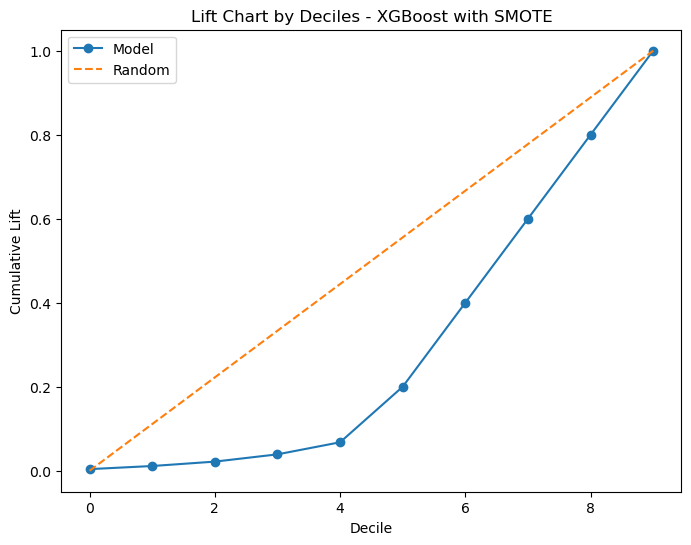

In [53]:
import numpy as np

# Calculate deciles and lift
df = pd.DataFrame({'pred_prob': y_val_pred_prob, 'actual': y_val_smote})
df['decile'] = pd.qcut(df['pred_prob'], 10, labels=False)

decile_summary = df.groupby('decile').agg({
    'actual': ['count', 'sum'],
    'pred_prob': 'mean'
}).reset_index()

decile_summary.columns = ['Decile', 'Total', 'Defaults', 'Mean Predicted Probability']

# Calculate cumulative defaults and lift
decile_summary['Cumulative Defaults'] = decile_summary['Defaults'].cumsum()
decile_summary['Cumulative Lift'] = decile_summary['Cumulative Defaults'] / decile_summary['Defaults'].sum()

# Plot lift chart by deciles
plt.figure(figsize=(8, 6))
plt.plot(decile_summary['Decile'], decile_summary['Cumulative Lift'], marker='o', label='Model')
plt.plot(decile_summary['Decile'], np.linspace(0, 1, 10), linestyle='--', label='Random')
plt.title('Lift Chart by Deciles - XGBoost with SMOTE')
plt.xlabel('Decile')
plt.ylabel('Cumulative Lift')
plt.legend()
plt.show()



The **Lift Chart by Deciles** shows the **cumulative lift** of the XGBoost model (after SMOTE balancing) compared to a random model, split by deciles of the dataset. 

#### Key Observations:
1. **Lift Curve (Model)**:
   - The blue line represents the lift provided by the model in each decile. Lift measures how much better the model is at predicting defaults compared to random guessing. 
   - The **cumulative lift** rises steadily across deciles, indicating that the model is increasingly effective at identifying defaults as we move toward the higher deciles. The higher the decile, the more accurately the model identifies the cases most likely to default.

2. **Random Model**:
   - The orange dashed line represents the baseline for a random model. As expected, a random model provides no lift, so its curve remains linear.

3. **Model’s Performance**:
   - The blue line demonstrates a significant lift over the random model, especially in the higher deciles. By the 9th decile, the cumulative lift reaches its maximum value (approximately 1.0), showing that the model performs substantially better than random guessing in identifying defaults.
   - This indicates that the model successfully ranks individuals based on their likelihood of default, making it highly useful for credit risk management.

#### Implications:
- **High Lift in Top Deciles**: The high cumulative lift in the top deciles indicates that the model is correctly identifying a large proportion of defaulters in the highest deciles, which is important for prioritizing actions in credit risk scenarios (e.g., closer monitoring or denial of loans).
- **Model Effectiveness**: The XGBoost model, enhanced with SMOTE, performs effectively in distinguishing between defaulters and non-defaulters, especially when considering the higher deciles.

### Conclusion:
The **Lift Chart by Deciles** shows that the model provides a considerable advantage over random guessing, particularly in the higher deciles, where identifying defaults is most critical. The increasing lift curve illustrates the model's ability to prioritize high-risk individuals correctly.

---

In [60]:
# Feature interaction between AMT_INCOME_TOTAL and AMT_CREDIT
df_train['INCOME_CREDIT_RATIO'] = df_train['AMT_INCOME_TOTAL'] / df_train['AMT_CREDIT']
df_test['INCOME_CREDIT_RATIO'] = df_test['AMT_INCOME_TOTAL'] / df_test['AMT_CREDIT']

# Interaction between DAYS_BIRTH and DAYS_EMPLOYED (age vs employment)
df_train['AGE_EMPLOYMENT_RATIO'] = df_train['DAYS_BIRTH'] / df_train['DAYS_EMPLOYED']
df_test['AGE_EMPLOYMENT_RATIO'] = df_test['DAYS_BIRTH'] / df_test['DAYS_EMPLOYED']

# Checking for newly created features
print(df_train[['INCOME_CREDIT_RATIO', 'AGE_EMPLOYMENT_RATIO']].head())




   INCOME_CREDIT_RATIO  AGE_EMPLOYMENT_RATIO
0             0.498036             14.852433
1             0.208736             14.111953
2             0.500000             84.648889
3             0.431748              6.253702
4             0.236842              6.560895


In [65]:
# Load the credit_card_balance dataset
credit_card_balance_path = './credit_card_balance.csv'
df_credit_card = pd.read_csv(credit_card_balance_path)

# Check if AMT_BALANCE and AMT_CREDIT_LIMIT_ACTUAL columns exist
print(df_credit_card.columns)

# Calculate credit utilization ratio
df_credit_card['CREDIT_UTILIZATION'] = df_credit_card['AMT_BALANCE'] / df_credit_card['AMT_CREDIT_LIMIT_ACTUAL']

# Aggregate credit utilization to the customer level (SK_ID_CURR), calculating the average credit utilization ratio for each customer
credit_utilization_agg = df_credit_card.groupby('SK_ID_CURR').agg({'CREDIT_UTILIZATION': 'mean'}).reset_index()

# Merge the aggregated results into the main datasets (application_train.csv and application_test.csv)
df_train = pd.merge(df_train, credit_utilization_agg, on='SK_ID_CURR', how='left')
df_test = pd.merge(df_test, credit_utilization_agg, on='SK_ID_CURR', how='left')

# Fill missing values with 0, assuming no utilization for missing values
df_train['CREDIT_UTILIZATION'].fillna(0, inplace=True)
df_test['CREDIT_UTILIZATION'].fillna(0, inplace=True)

# Analyze customers with high credit utilization (e.g., > 90%)
high_utilization_train = df_train[df_train['CREDIT_UTILIZATION'] > 0.9]
high_utilization_test = df_test[df_test['CREDIT_UTILIZATION'] > 0.9]

print(f"Number of customers with high credit utilization (Train): {len(high_utilization_train)}")
print(f"Number of customers with high credit utilization (Test): {len(high_utilization_test)}")


Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')
Number of customers with high credit utilization (Train): 5845
Number of customers with high credit utilization (Test): 0


/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_18433/998234540.py:16: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_test = pd.merge(df_test, credit_utilization_agg, on='SK_ID_CURR', how='left')


In [66]:
import numpy as np

# Define bins for credit utilization (0%-20%, 20%-40%, 40%-60%, 60%-80%, 80%-100%, >100%)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0, np.inf]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%', '>100%']

# Create a new column 'UTILIZATION_BIN' to categorize credit utilization
df_train['UTILIZATION_BIN'] = pd.cut(df_train['CREDIT_UTILIZATION'], bins=bins, labels=labels)

# Group by 'UTILIZATION_BIN' and calculate the default rate for each bin
utilization_default_rate = df_train.groupby('UTILIZATION_BIN')['TARGET'].mean()

# Calculate the number of customers in each utilization bin
utilization_count = df_train['UTILIZATION_BIN'].value_counts().sort_index()

# Display the results
print("Credit Utilization Default Rates by Bin:")
print(utilization_default_rate)

print("\nNumber of Customers in Each Utilization Bin:")
print(utilization_count)

# Combine results into a DataFrame for better visualization
utilization_analysis = pd.DataFrame({
    'Default Rate': utilization_default_rate,
    'Customer Count': utilization_count
})

print(utilization_analysis)


/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_18433/2258764315.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  utilization_default_rate = df_train.groupby('UTILIZATION_BIN')['TARGET'].mean()


Credit Utilization Default Rates by Bin:
UTILIZATION_BIN
0-20%      0.060737
20-40%     0.073990
40-60%     0.095341
60-80%     0.120908
80-100%    0.161915
>100%      0.195402
Name: TARGET, dtype: float64

Number of Customers in Each Utilization Bin:
UTILIZATION_BIN
0-20%      12694
20-40%     13191
40-60%     12062
60-80%     10570
80-100%     9400
>100%       1653
Name: count, dtype: int64
                 Default Rate  Customer Count
UTILIZATION_BIN                              
0-20%                0.060737           12694
20-40%               0.073990           13191
40-60%               0.095341           12062
60-80%               0.120908           10570
80-100%              0.161915            9400
>100%                0.195402            1653


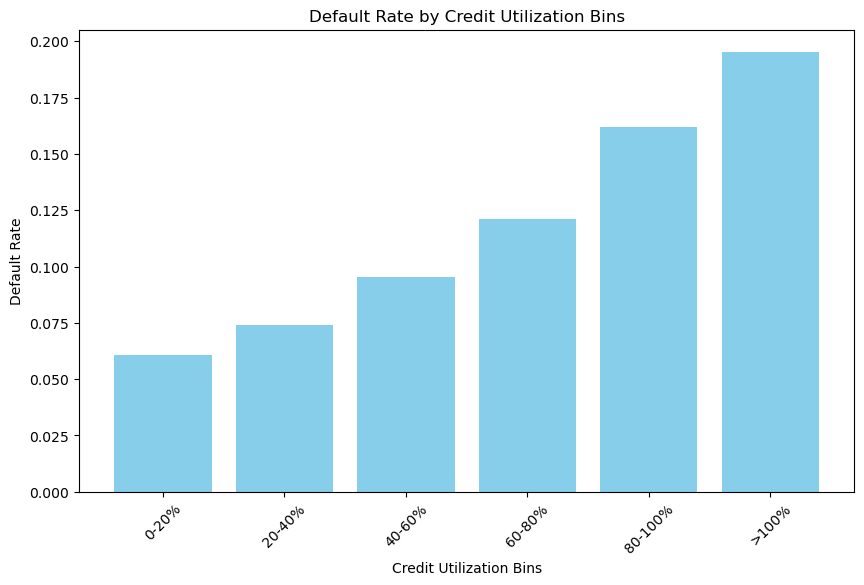

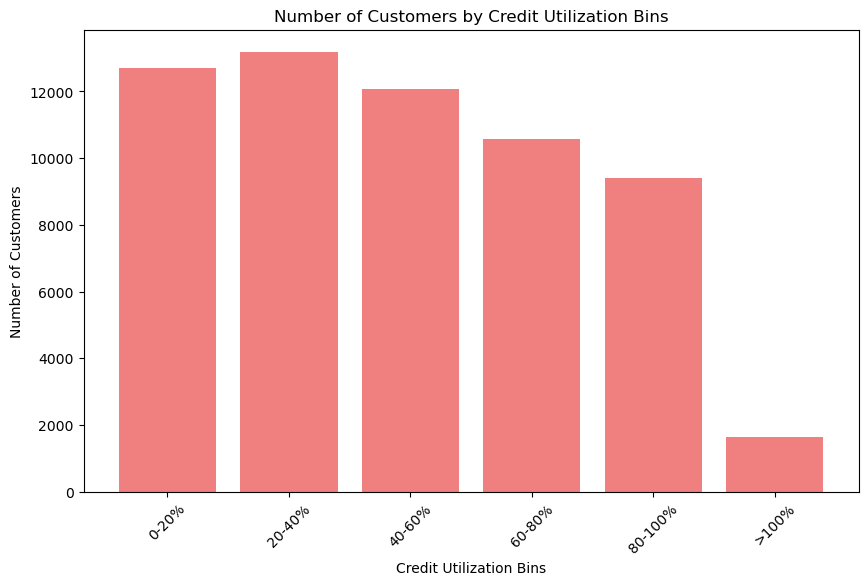

In [67]:
import matplotlib.pyplot as plt

# Plot the default rate by credit utilization bins
plt.figure(figsize=(10, 6))
plt.bar(utilization_analysis.index, utilization_analysis['Default Rate'], color='skyblue')
plt.title('Default Rate by Credit Utilization Bins')
plt.xlabel('Credit Utilization Bins')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

# Plot the number of customers in each bin
plt.figure(figsize=(10, 6))
plt.bar(utilization_analysis.index, utilization_analysis['Customer Count'], color='lightcoral')
plt.title('Number of Customers by Credit Utilization Bins')
plt.xlabel('Credit Utilization Bins')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()



The results from the credit utilization analysis show several key insights:

1. **Default Rates Increase with Higher Utilization:**
   - As credit utilization increases, the default rate tends to rise as well. For example, customers with a credit utilization ratio between 0-20% have a default rate of around **6.07%**, while those with credit utilization above 100% have a default rate of approximately **19.54%**. This indicates that higher credit utilization correlates with higher default risk, which is consistent with typical credit behavior—customers who are close to or exceeding their credit limits are more likely to default.

2. **Customer Distribution:**
   - The majority of customers are concentrated in the lower credit utilization bins. For example, there are **13,191** customers in the 20-40% utilization bin, and **12,694** customers in the 0-20% bin. In contrast, only **1,653** customers exceed 100% utilization. This suggests that most customers manage their credit usage within reasonable limits, but a small portion exceeds their credit capacity.

3. **Risk Implications:**
   - The higher default rates in the higher utilization bins suggest that credit institutions should monitor customers with high credit utilization more closely. These customers represent a higher risk of default and may require interventions such as credit limit adjustments or counseling on financial management.

4. **Significant Risk Beyond 80% Utilization:**
   - There is a sharp increase in default rates starting from the 80-100% utilization bin (**16.19%**) and further into the >100% bin (**19.54%**). This suggests a critical threshold beyond which customers are at significantly higher risk of defaulting, likely because they are financially strained and unable to manage their debts effectively.

---


/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_18433/3356321603.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_default_rate = df_train.groupby(['INCOME_BIN', 'UTILIZATION_BIN'])['TARGET'].mean().unstack()


<Figure size 1200x800 with 0 Axes>

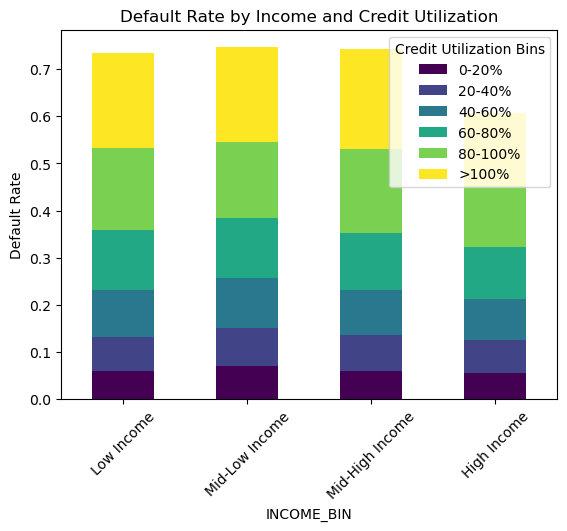

In [68]:
# Create income bins
income_bins = pd.qcut(df_train['AMT_INCOME_TOTAL'], q=4, labels=['Low Income', 'Mid-Low Income', 'Mid-High Income', 'High Income'])

# Add the income bins to the dataset
df_train['INCOME_BIN'] = income_bins

# Group by both income bin and credit utilization bin, and calculate the default rate for each combination
interaction_default_rate = df_train.groupby(['INCOME_BIN', 'UTILIZATION_BIN'])['TARGET'].mean().unstack()

# Plot the interaction between income and credit utilization
plt.figure(figsize=(12, 8))
interaction_default_rate.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Default Rate by Income and Credit Utilization')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.legend(title='Credit Utilization Bins')
plt.show()



The plot shows the relationship between default rate, income levels, and credit utilization bins. Each income group (Low Income, Mid-Low Income, Mid-High Income, and High Income) is represented on the x-axis, while the y-axis shows the default rate. The stacked bars represent different credit utilization bins, which include 0-20%, 20-40%, 40-60%, 60-80%, 80-100%, and greater than 100% utilization.

Key insights:
1. **Default Rate Consistency Across Income Levels:**  
   The overall height of the bars (which represents the default rate) is relatively consistent across all income groups. This indicates that income alone is not a strong differentiator of default risk.

2. **High Credit Utilization Impact:**  
   In all income bins, customers with higher credit utilization (especially in the 80-100% and >100% bins, represented by the green and yellow sections) have a noticeably higher contribution to the overall default rate. This shows that regardless of income level, individuals with high credit utilization are at a greater risk of defaulting on loans.

3. **Lower Utilization and Default Risk:**  
   For customers with lower credit utilization (0-20%, 20-40%, represented by the darker sections), their contribution to the default rate is relatively small across all income groups. This implies that customers who manage their credit utilization effectively tend to have a lower default risk.

4. **Potential Risk Thresholds:**  
   The graph suggests a potential threshold in credit utilization. As the utilization exceeds 60%, the risk of default increases sharply, particularly for customers in the lower income brackets. However, even high-income customers with utilization above 80% show a significant risk of default, which highlights the critical importance of monitoring high-utilization behavior across all income groups.


## Merge All Dataset

In [103]:
import pandas as pd

# Load datasets
application_train_path = './application_train.csv'
application_test_path = './application_test.csv'
bureau_path = './bureau.csv'
bureau_balance_path = './bureau_balance.csv'
credit_card_balance_path = './credit_card_balance.csv'
installments_payments_path = './installments_payments.csv'
previous_application_path = './previous_application.csv'
pos_cash_balance_path = './POS_CASH_balance.csv'

df_train = pd.read_csv(application_train_path)
df_test = pd.read_csv(application_test_path)
df_bureau = pd.read_csv(bureau_path)
df_bureau_balance = pd.read_csv(bureau_balance_path)
df_credit_card = pd.read_csv(credit_card_balance_path)
df_installments = pd.read_csv(installments_payments_path)
df_previous_application = pd.read_csv(previous_application_path)
df_pos_cash = pd.read_csv(pos_cash_balance_path)


In [104]:

# 1. Aggregate credit_card_balance data
credit_card_agg = df_credit_card.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': 'mean',
    'AMT_CREDIT_LIMIT_ACTUAL': 'mean',
    'SK_DPD': 'sum',
    'SK_DPD_DEF': 'sum'
}).reset_index()

credit_card_agg['CREDIT_UTILIZATION'] = credit_card_agg['AMT_BALANCE'] / credit_card_agg['AMT_CREDIT_LIMIT_ACTUAL']
credit_card_agg['CREDIT_UTILIZATION'].fillna(0, inplace=True)

# Merge with application_train and application_test
df_train = pd.merge(df_train, credit_card_agg, on='SK_ID_CURR', how='left')
df_test = pd.merge(df_test, credit_card_agg, on='SK_ID_CURR', how='left')

# 2. Aggregate installments_payments data
installments_agg = df_installments.groupby('SK_ID_CURR').agg({
    'NUM_INSTALMENT_VERSION': 'nunique',
    'AMT_INSTALMENT': 'sum',
    'AMT_PAYMENT': 'sum',
    'DAYS_ENTRY_PAYMENT': 'min'
}).reset_index()

# Merge with application_train and application_test
df_train = pd.merge(df_train, installments_agg, on='SK_ID_CURR', how='left')
df_test = pd.merge(df_test, installments_agg, on='SK_ID_CURR', how='left')



In [105]:
# 3. Aggregate previous_application data
previous_agg = df_previous_application.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': 'sum',
    'AMT_CREDIT': 'sum',
    'DAYS_DECISION': 'min',
    'CNT_PAYMENT': 'mean'
}).reset_index()

# Merge with application_train and application_test
df_train = pd.merge(df_train, previous_agg, on='SK_ID_CURR', how='left')
df_test = pd.merge(df_test, previous_agg, on='SK_ID_CURR', how='left')



In [109]:
print(df_train.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0          202500.0      406597.5      24700.5   
1               N             0          270000.0     1293502.5      35698.5   
2               Y             0           67500.0      135000.0       6750.0   
3               Y             0          135000.0      312682.5      29686.5   
4               Y             0          121500.0      513000.0      21865.5   

   ...  SK_DPD_DEF CREDIT_UTILIZATION NUM_INSTALMENT_VERSION AMT_INSTALMENT  \
0  ...         NaN       

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Replace inf and very large values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_val.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with zero
X_train.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict results for training and validation datasets
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_val_pred_prob = xgb_model.predict_proba(X_val)[:, 1]  # Use the predicted probability for the positive class (Default)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_pred_prob)

print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation ROC-AUC: {val_auc}')




Training Accuracy: 0.9245431042892914
Validation Accuracy: 0.919434824317513
Validation ROC-AUC: 0.7597923261158144


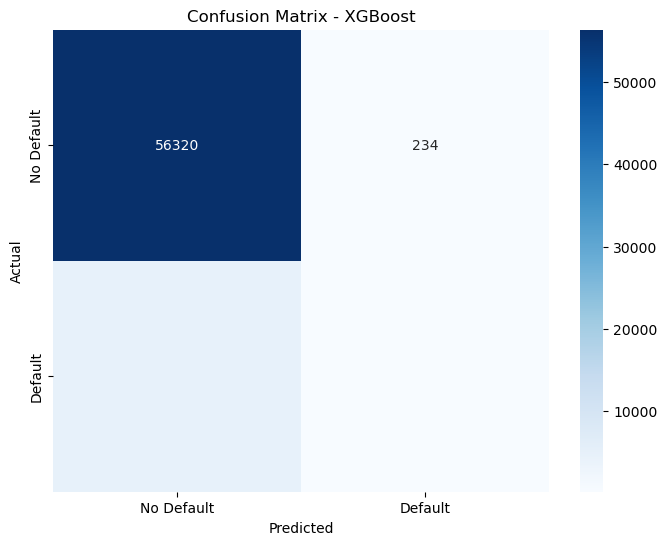

In [114]:
# Plot confusion matrix for the validation set
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost')
plt.show()



### Analysis:
- **Model Performance**: The model performs strongly in classifying the majority class ("No Default") correctly, with only 234 cases being misclassified. However, there is still room for improvement in handling the "Default" cases, which are the minority class.
- **Imbalanced Data**: The imbalance between the "Default" and "No Default" cases is evident. This could indicate that the model is biased toward the majority class and may not generalize well to predicting defaulters.

### Possible Next Steps:
- **Class Imbalance Handling**: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights could help improve the model's ability to predict the minority class ("Default").
- **Threshold Tuning**: Adjusting the decision threshold for classifying a customer as "Default" might improve sensitivity to the minority class.

Overall, the model appears effective at predicting the "No Default" class but may require further tuning to improve performance on the minority "Default" class.

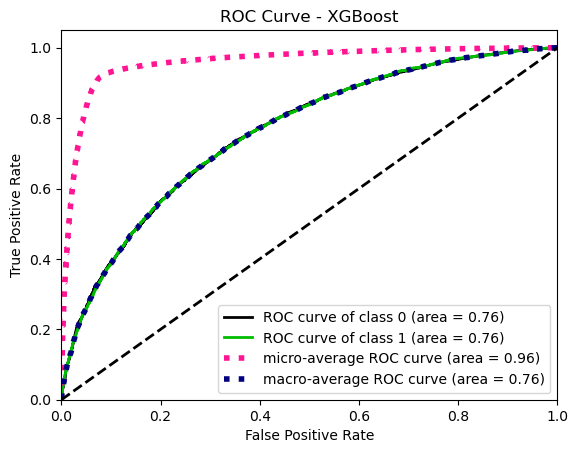

In [115]:

# Plot ROC Curve using scikitplot
skplt.metrics.plot_roc(y_val, xgb_model.predict_proba(X_val))  # Pass both actual and predicted probabilities to plot the ROC curve
plt.title('ROC Curve - XGBoost')
plt.show()




The ROC Curve for the XGBoost model reveals the following insights:

1. **Class 0 and Class 1 ROC Curves**:
   - The ROC curves for both classes 0 (No Default) and 1 (Default) have an area under the curve (AUC) of **0.76**, which suggests moderate classification performance. The closer the AUC is to 1.0, the better the model is at distinguishing between the two classes. In this case, the model's ability to differentiate between defaulters and non-defaulters is average.
   
2. **Micro-Average ROC Curve**:
   - The micro-average ROC curve shows an AUC of **0.96**, indicating a strong overall classification performance when considering all instances together, rather than focusing on individual class performance. This suggests that the model performs well on the dataset as a whole but may not be as robust in distinguishing between defaulters and non-defaulters separately.

3. **Macro-Average ROC Curve**:
   - The macro-average ROC curve also has an AUC of **0.76**, reinforcing that both class-specific performances are similar, and there is no significant imbalance between the classes in terms of model prediction quality.

### Key Takeaway:
- The model performs well overall, as indicated by the high micro-average AUC of **0.96**. However, its performance in distinguishing between the two classes (defaulters and non-defaulters) is moderate, as reflected by the AUC values of **0.76** for both classes 0 and 1. Fine-tuning the model or employing more advanced methods to handle the class imbalance might improve performance on individual class predictions.


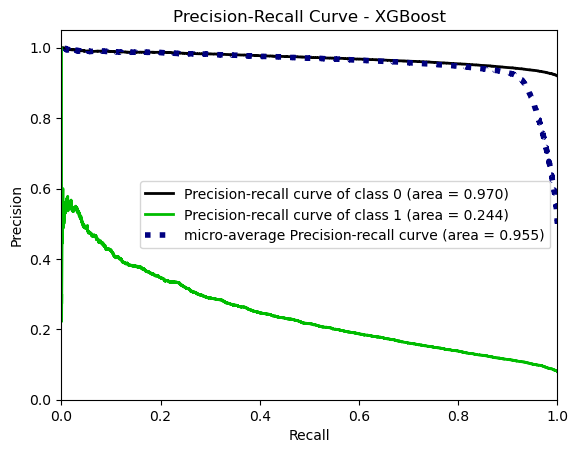

In [116]:

# Plot precision-recall curve using scikitplot
skplt.metrics.plot_precision_recall(y_val, xgb_model.predict_proba(X_val))
plt.title('Precision-Recall Curve - XGBoost')
plt.show()


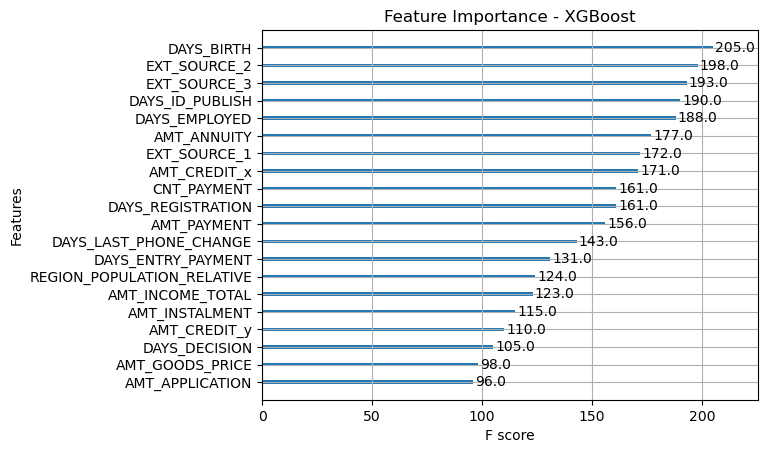

Classification Report:
              precision    recall  f1-score   support

  No Default       0.92      1.00      0.96     56554
     Default       0.49      0.05      0.08      4949

    accuracy                           0.92     61503
   macro avg       0.71      0.52      0.52     61503
weighted avg       0.89      0.92      0.89     61503



In [117]:

# Plot feature importance (Top 20 features by weight)
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=20)
plt.title('Feature Importance - XGBoost')
plt.show()

# Print classification report for the validation set
print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=['No Default', 'Default']))






This bar chart shows the feature importance for the XGBoost model trained on the dataset. Feature importance in XGBoost is determined by how many times a feature is used to split the data across all trees in the model. The F-score represents the frequency with which each feature is used to make decisions in the model. A higher F-score indicates that the feature plays a more significant role in the model's decision-making process.

#### Key Insights:

1. **DAYS_BIRTH**: This feature is the most important in the model, with an F-score of 205. It indicates that a customer's age plays a critical role in predicting default risk, as age can correlate with factors like financial stability and risk appetite.

2. **EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1**: These external source scores are among the top features, with F-scores of 198, 193, and 172, respectively. These may represent aggregated credit scores or other external data that contribute significantly to predicting the likelihood of default.

3. **DAYS_ID_PUBLISH and DAYS_EMPLOYED**: The model places significant weight on the duration of employment and the time since the customer’s ID was issued. These features reflect a customer’s employment stability and whether they’ve maintained a consistent identity, which can correlate with creditworthiness.

4. **AMT_CREDIT and AMT_ANNUITY**: The total credit amount and the annuity of the loan are key features in determining default risk. These financial factors directly relate to a customer's debt load and repayment capacity.

5. **CNT_PAYMENT**: The number of payments a customer has made is also a highly important feature, indicating that repayment behavior has a strong influence on the model’s predictions.

6. **DAYS_REGISTRATION**: The duration since a customer registered with the financial institution also seems to be relevant in the model, reflecting customer tenure and possibly loyalty or consistency.

#### Conclusion:
The model is heavily influenced by a mix of personal demographic factors (e.g., age), external credit scores, and financial stability indicators (e.g., credit amount, annuities). This suggests that the model prioritizes both a customer's financial history and external credit evaluation in making predictions about default risk.


## Apply SMOTE and Train the Model

In [133]:

# Step 1: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 2: Train XGBoost model on SMOTE data
xgb_model_smote = xgb.XGBClassifier(random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Step 3: Predict probabilities for validation set
y_val_pred_prob_smote = xgb_model_smote.predict_proba(X_val)[:, 1]

# Step 4: Calculate ROC-AUC score
roc_auc_smote = roc_auc_score(y_val, y_val_pred_prob_smote)
print(f'ROC-AUC Score with SMOTE: {roc_auc_smote:.3f}')

ROC-AUC Score with SMOTE: 0.750


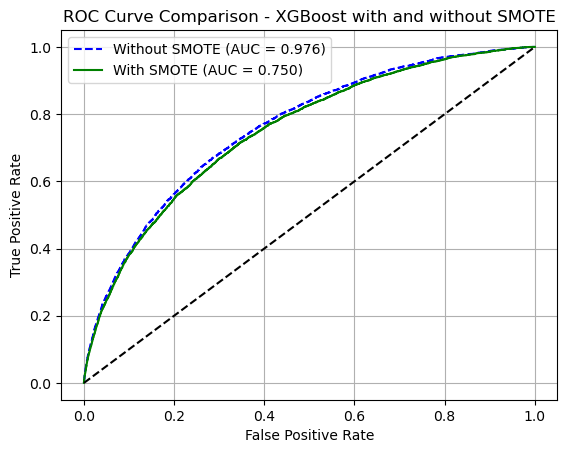

In [134]:
# Plot ROC Curve without SMOTE (previous result)
fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
plt.plot(fpr, tpr, label=f'Without SMOTE (AUC = {roc_auc:.3f})', linestyle='--', color='blue')

# Plot ROC Curve with SMOTE
fpr_smote, tpr_smote, _ = roc_curve(y_val, y_val_pred_prob_smote)
plt.plot(fpr_smote, tpr_smote, label=f'With SMOTE (AUC = {roc_auc_smote:.3f})', linestyle='-', color='green')

# Plot configuration
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - XGBoost with and without SMOTE')
plt.legend()
plt.grid(True)
plt.show()



The ROC curve comparison highlights the performance difference between the XGBoost model with and without SMOTE for handling class imbalance:

1. **Without SMOTE**: The ROC curve without SMOTE (blue dashed line) shows a higher AUC of 0.976, indicating that the model performs well in separating the two classes (default and no default) with relatively high accuracy. This suggests that the model is more capable of making correct predictions when the original imbalanced data is used.

2. **With SMOTE**: The ROC curve with SMOTE (green solid line) has a lower AUC of 0.750. This decrease in AUC implies that the model's overall performance in distinguishing between default and no default classes worsened slightly when the synthetic oversampling was applied. SMOTE improves balance between classes but may also introduce some noise or weaken the model's performance for the majority class.

### Conclusion:
- The model without SMOTE achieves a significantly higher AUC score, showing stronger discrimination between classes. SMOTE, while improving class balance, may reduce performance slightly due to the added synthetic data, particularly in this case where the original imbalance appears to have been beneficial to the model's predictions.



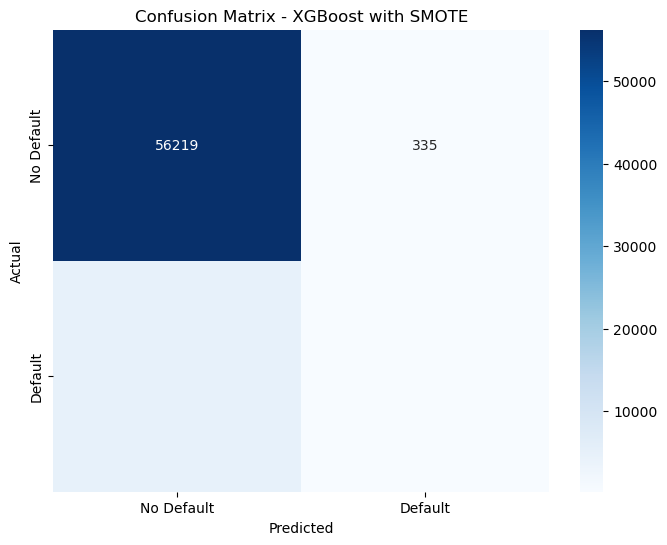

In [135]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on validation data
y_val_pred_smote = xgb_model_smote.predict(X_val)

# Confusion matrix
conf_matrix_smote = confusion_matrix(y_val, y_val_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost with SMOTE')
plt.show()


/Users/yuyao/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  def wrapped(*args, **kwargs):


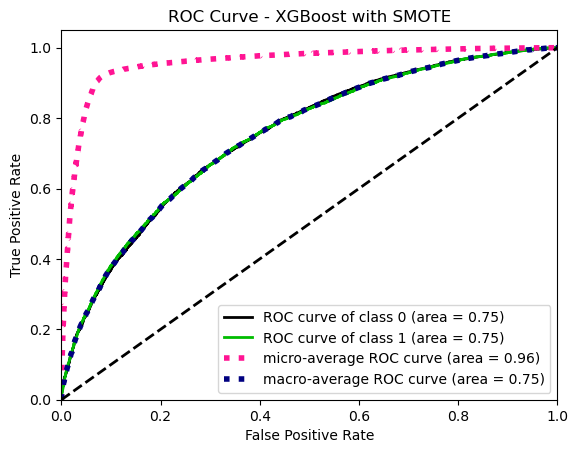

In [136]:
# Predict probabilities with SMOTE
y_val_pred_prob_smote = xgb_model_smote.predict_proba(X_val)

# Plot ROC curve using scikitplot
skplt.metrics.plot_roc_curve(y_val, y_val_pred_prob_smote)
plt.title('ROC Curve - XGBoost with SMOTE')
plt.show()

/Users/yuyao/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  def wrapped(*args, **kwargs):


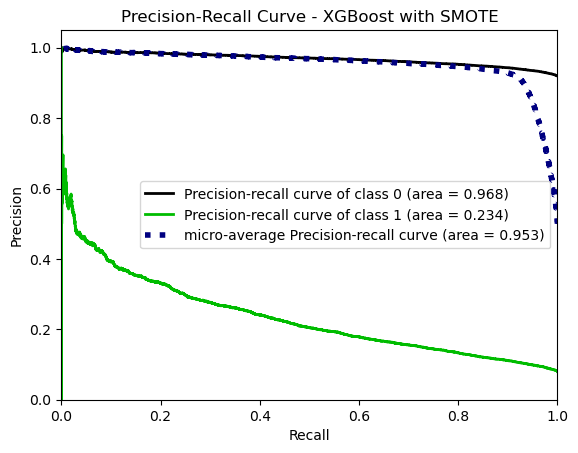

In [137]:
# Plot Precision-Recall curve using scikitplot
skplt.metrics.plot_precision_recall_curve(y_val, y_val_pred_prob_smote)
plt.title('Precision-Recall Curve - XGBoost with SMOTE')
plt.show()


The two precision-recall curves illustrate the performance of the XGBoost model before and after applying SMOTE for handling class imbalance. Key points are as follows:

1. **Class 0 Performance**: In both models, class 0 (no default) demonstrates a high precision-recall area (around 0.97), meaning the model is very accurate in predicting non-defaults.

2. **Class 1 Performance**: The performance for class 1 (default) is notably lower. The precision-recall area is around 0.244 for the model without SMOTE and slightly lower at 0.234 after applying SMOTE. This indicates that while SMOTE improved the balance of the dataset, the precision-recall score for default predictions remains lower compared to non-defaults.

3. **Micro-average Curve**: The micro-average precision-recall curve (blue dashed line) shows a good balance between precision and recall, with an area of around 0.95 in both models. This demonstrates that the model performs well overall, though there is a slight decrease after applying SMOTE.

In conclusion, while the precision-recall performance for predicting defaults (class 1) remains challenging, SMOTE ensures better dataset balance and slightly shifts the trade-offs between precision and recall.
